# DEEP lEARNING: Perceptrón

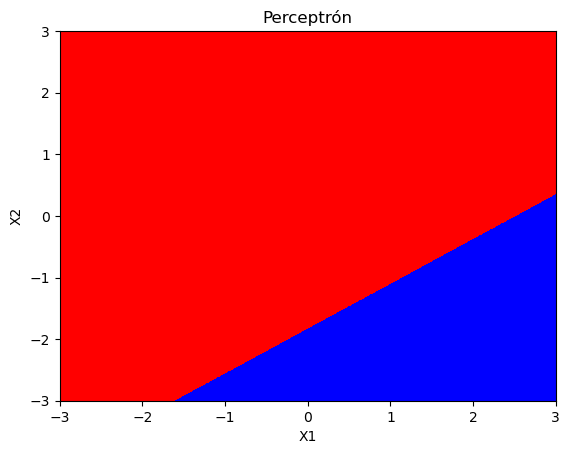

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Definir la función del perceptrón
def perceptron(x1, x2):
    W0 = 2
    W1 = -0.8
    W2 = 1.1
    z = W0 + W1 * x1 + W2 * x2
    return 1 if z >= 0 else 0

# Crear la malla de puntos
x = np.linspace(-3, 3, 1000)
X1, X2 = np.meshgrid(x, x)
Z = np.zeros(X1.shape) # Vamos a crear una malla de 0s y después 

# Calcular la clase asignada por el perceptrón para cada punto de la malla
for i in range(X1.shape[0]):
    for j in range(X1.shape[1]):
        Z[i, j] = perceptron(X1[i, j], X2[i, j])

# Visualizar las clases con contourf
plt.contourf(X1, X2, Z, levels=[-0.5, 0.5, 1.5], colors=['blue', 'red'])
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Perceptrón')
plt.show()

In [4]:
perceptron(-2,-2)

1

Todos los untos del plano que provocarían 

---

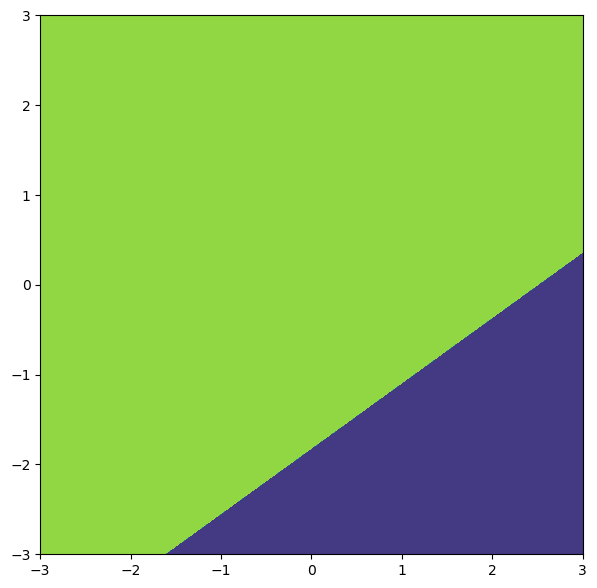

In [9]:
import numpy as np
import matplotlib.pyplot as plt

coord = np.linspace(-3, 3, 1000)

x1, x2 = np.meshgrid(coord, coord)
# print(x1)
# print(x2)

z = 2 - 0.8 * x1 + 1.1 * x2
# print(z)

i = 0
for zi in z:
    j = 0
    for zj in zi:
        if zj >= 0:
            z[i][j] = 1
        else:
            z[i][j] = 0
        j = j + 1
    i = i + 1
# print(0)         
fig, ax = plt.subplots(figsize = (7, 7))
ax.set_aspect("auto")
ax.contourf(x1, x2, z, levels = 2, zorder = 0);

---

# DEEP LEARNING: Configuración del Perceptrón

BIAS es el corte con el eje

---

---

In [119]:
import seaborn as sb
iris = sb.load_dataset("iris")
iris.sample(5, random_state = 0)

,sepal_length,sepal_width,petal_length,petal_width,species
114,5.8,2.8,5.1,2.4,virginica
62,6.0,2.2,4.0,1.0,versicolor
33,5.5,4.2,1.4,0.2,setosa
107,7.3,2.9,6.3,1.8,virginica
7,5.0,3.4,1.5,0.2,setosa


In [120]:
iris.shape

(150, 5)

In [121]:
# Codificamos la columna "species"
iris["label"] = iris.species.astype("category").cat.codes # Vamos a crear la columna "label"
iris.sample(5, random_state = 0)

,sepal_length,sepal_width,petal_length,petal_width,species,label
114,5.8,2.8,5.1,2.4,virginica,2
62,6.0,2.2,4.0,1.0,versicolor,1
33,5.5,4.2,1.4,0.2,setosa,0
107,7.3,2.9,6.3,1.8,virginica,2
7,5.0,3.4,1.5,0.2,setosa,0


In [122]:
from sklearn.linear_model import Perceptron

El Perceptrón es un clasificador binario (puede trabajar con dos clases/salidas)

In [123]:
iris = iris[iris.species.isin(["setosa", "versicolor"])]
iris.shape # el dataset se ha reducido a 100

(100, 6)

Para poder visualir los resultados en el plano, vamos a selecciona dos cara.....................

In [124]:
X = iris[["sepal_length", "sepal_width"]]
y = iris["label"]

### Ahora istanciaremos la clase Perceptron con sus parámetros por defecto, y entrenamos el modelo

In [125]:
model = Perceptron(random_state = 0)
model.fit(X.values, y.values)

Perceptron()

In [126]:
model.predict(np.array([5.4, 4]).reshape(1, -1))
# vemos que la predicción es correcta

array([0], dtype=int8)

In [127]:
import fronteras as fr

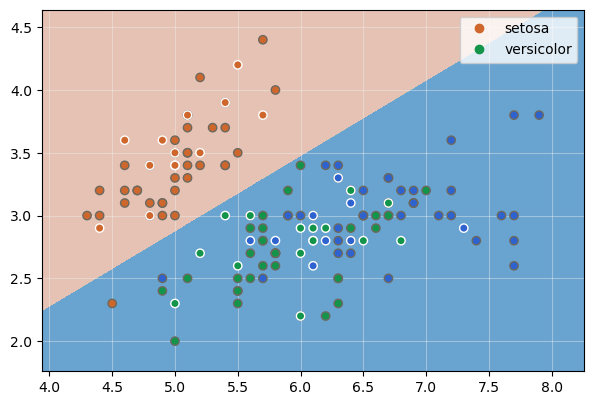

In [128]:
fr.mostrar_fronteras(model, X_train.values, X_test.values, y_train, y_test, iris.species.unique())

Comprobamos que el entrenamiento no ha funcionado

In [129]:
model.score(X.values, y.values)

0.99

El score es del 99%. Eran 100 muestras, por lo que ha quedado una muestra mal clasificada, tal y como se  veía en la imagen previa.

Vamos a ver el nº de veces que los datos ha pasado por la neurona antes de que el algoritmo haya parado el entrenamiento (el número de iteraciones/muestras). Para ello usamos el atributo ".n_iter_"

In [130]:
model.n_iter_

8

In [131]:
model.get_params()

{'alpha': 0.0001,
 'class_weight': None,
 'early_stopping': False,
 'eta0': 1.0,
 'fit_intercept': True,
 'l1_ratio': 0.15,
 'max_iter': 1000,
 'n_iter_no_change': 5,
 'n_jobs': None,
 'penalty': None,
 'random_state': 0,
 'shuffle': True,
 'tol': 0.001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [132]:
model = Perceptron(n_iter_no_change = 300, random_state = 0)
model.fit(X.values, y.values)
score = model.score(X.values, y.values)
print(model.n_iter_)
print(score)

837
1.0


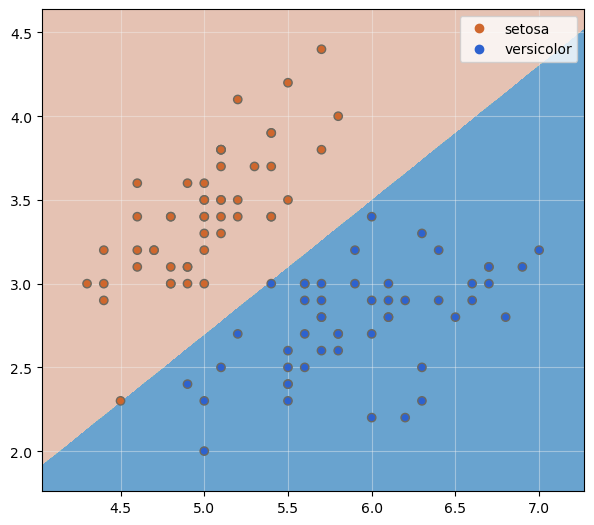

In [133]:
fr.mostrar_fronteras(model, X.values, None, y.values, None, iris.species.unique())

---
# EJERCICIO

In [148]:
import seaborn as sb
iris = sb.load_dataset("iris")
iris.sample(5, random_state = 0)

,sepal_length,sepal_width,petal_length,petal_width,species
114,5.8,2.8,5.1,2.4,virginica
62,6.0,2.2,4.0,1.0,versicolor
33,5.5,4.2,1.4,0.2,setosa
107,7.3,2.9,6.3,1.8,virginica
7,5.0,3.4,1.5,0.2,setosa


In [149]:
# Codificamos la columna "species"
iris["label"] = iris.species.astype("category").cat.codes # Vamos a crear la columna "label"
iris.sample(5, random_state = 0)

,sepal_length,sepal_width,petal_length,petal_width,species,label
114,5.8,2.8,5.1,2.4,virginica,2
62,6.0,2.2,4.0,1.0,versicolor,1
33,5.5,4.2,1.4,0.2,setosa,0
107,7.3,2.9,6.3,1.8,virginica,2
7,5.0,3.4,1.5,0.2,setosa,0


In [150]:
iris.shape # el dataset se ha reducido a 100

(150, 6)

In [151]:
X = iris[["sepal_length", "sepal_width"]]
y = iris["label"]

In [152]:
model2 = Perceptron(random_state = 0)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.2, random_state = 0) # STRATFY te coje las muestras de manera equitativa

model2.fit(X_train.values, y_train.values)

Perceptron()

In [155]:
model2 = Perceptron(n_iter_no_change = 350, random_state = 0)
model2.fit(X.values, y.values)
score = model2.score(X.values, y.values)
print(model.n_iter_)
print(score)

837
0.78


C:\Users\72478072N\AppData\Local\anaconda3\envs\CursoIA\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


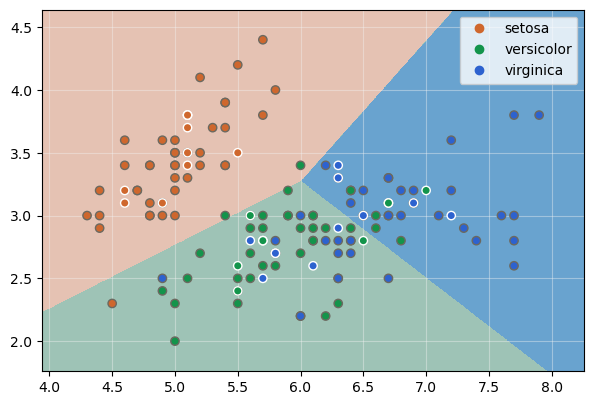

In [156]:
fr.mostrar_fronteras(model2, X_train.values, X_test.values, y_train, y_test, iris.species.unique())

---
### SOLUCIÓN
---

---

In [169]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train) # Fija los parametros del transformador
X_test_std = scaler.transform(X_test) # Esta función lo utiliza

In [170]:
model = Perceptron(eta0 = 0.1, random_state = 10)
model.fit(X_train_std, y_train)

Perceptron(eta0=0.1, random_state=10)

In [171]:
scor = model.score(X_test_std, y_test)
print(scor)
print(model.n_iter_)

0.7333333333333333
12


---
# Ejercicio

    · Hacer un gráfico de las fronteras de decisión situando los datos de entrenamiento.
    · Hacer un gráfocp de las fronteras de decisión situando los datos validación.
    · Hacer un grafo de las fronteras de decisión situando los datos de entrenamiento y validación.

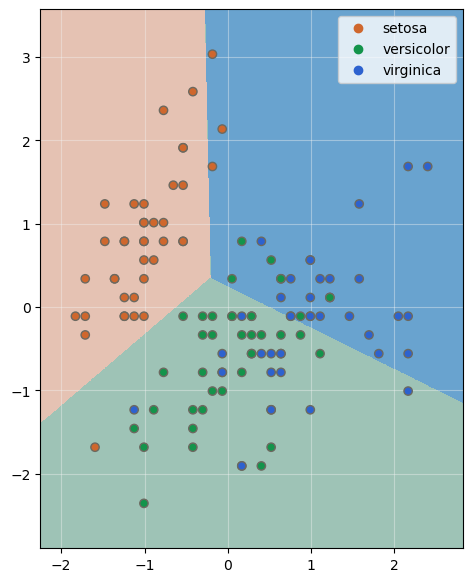

In [172]:
fr.mostrar_fronteras(model, X_train_std, None, y_train, None, iris.species.unique())

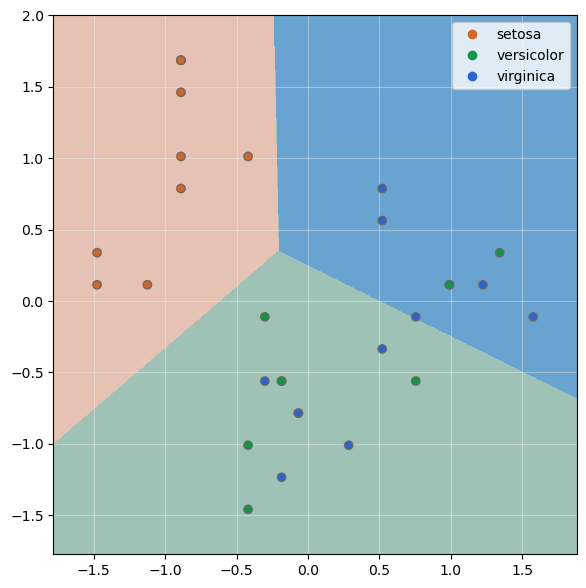

In [174]:
fr.mostrar_fronteras(model, X_test_std, None, y_test, None, iris.species.unique())

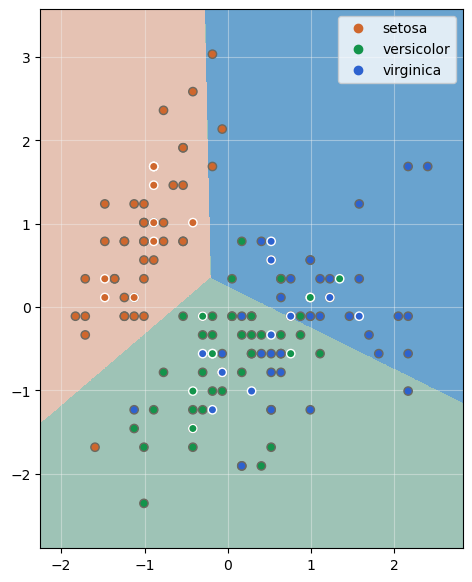

In [175]:
fr.mostrar_fronteras(model,X_train_std, X_test_std, y_train, y_test, iris.species.unique())